[*********************100%***********************]  1 of 1 completed


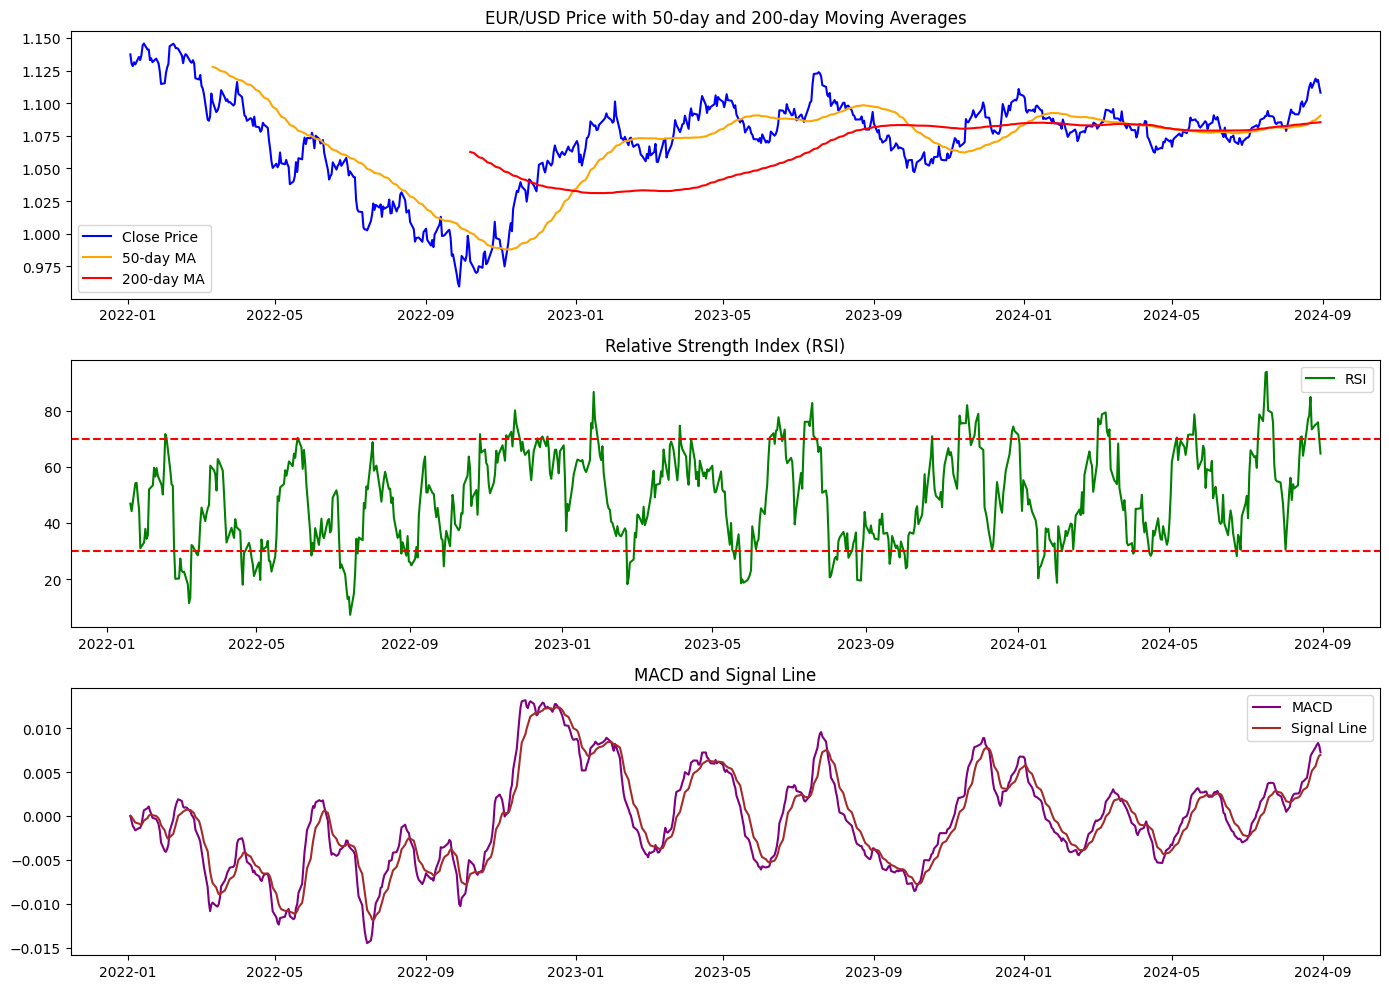

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch EUR/USD data from yfinance (symbol: 'EURUSD=X')
eur_usd = yf.download('EURUSD=X', start='2022-01-01', end='2024-09-01')

# Calculate Moving Averages
eur_usd['MA_50'] = eur_usd['Close'].rolling(window=50).mean()
eur_usd['MA_200'] = eur_usd['Close'].rolling(window=200).mean()

# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

eur_usd['RSI'] = calculate_rsi(eur_usd['Close'])

# Calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

eur_usd['MACD'], eur_usd['Signal'] = calculate_macd(eur_usd['Close'])

# Plotting the analysis
plt.figure(figsize=(14, 10))

# Plotting the Close price with Moving Averages
plt.subplot(3, 1, 1)
plt.plot(eur_usd.index, eur_usd['Close'], label='Close Price', color='blue')
plt.plot(eur_usd.index, eur_usd['MA_50'], label='50-day MA', color='orange')
plt.plot(eur_usd.index, eur_usd['MA_200'], label='200-day MA', color='red')
plt.title('EUR/USD Price with 50-day and 200-day Moving Averages')
plt.legend()

# Plotting RSI
plt.subplot(3, 1, 2)
plt.plot(eur_usd.index, eur_usd['RSI'], label='RSI', color='green')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Plotting MACD
plt.subplot(3, 1, 3)
plt.plot(eur_usd.index, eur_usd['MACD'], label='MACD', color='purple')
plt.plot(eur_usd.index, eur_usd['Signal'], label='Signal Line', color='brown')
plt.title('MACD and Signal Line')
plt.legend()

plt.tight_layout()
plt.show()
